So sánh Apriori vs FP-Growth  
Notebook này thực hiện:
- Load kết quả luật Apriori và FP-Growth  
- So sánh về:
  - Số lượng luật sinh ra
  - Thời gian chạy
  - Hiệu quả tìm luật mạnh
  - Độ bao phủ sản phẩm trong luật
- Trực quan hoá so sánh
- Kết luận & khuyến nghị sử dụng

Mục tiêu: đánh giá FP-Growth có thực sự vượt trội hơn Apriori trong dataset lớn hay không.

In [1]:
# PARAMETERS (for papermill)

RULES_APRIORI_PATH = "data/processed/rules_apriori_filtered.csv"
RULES_FPG_PATH      = "data/processed/rules_fpgrowth_filtered.csv"

EXEC_TIME_APRIORI_PATH = "data/processed/apriori_time.txt"
EXEC_TIME_FPG_PATH     = "data/processed/fpgrowth_time.txt"

OUTPUT_COMPARE_TABLE = "data/processed/comparison_apriori_vs_fpg.csv"


In [2]:
# Parameters
AR_RULES_PATH = "data/processed/rules_apriori_filtered.csv"
FPG_RULES_PATH = "data/processed/rules_fpgrowth_filtered.csv"
EXEC_TIME_APRIORI_PATH = "data/processed/apriori_time.txt"
EXEC_TIME_FPG_PATH = "data/processed/fpgrowth_time.txt"
OUTPUT_COMPARE_TABLE = "data/processed/comparison_apriori_vs_fpg.csv"


## Set up

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


## Load rules

In [4]:
rules_ap = pd.read_csv(RULES_APRIORI_PATH)
rules_fpg = pd.read_csv(RULES_FPG_PATH)

print("=== Luật Apriori ===")
print(f"- Số luật: {rules_ap.shape[0]:,}")

print("=== Luật FP-Growth ===")
print(f"- Số luật: {rules_fpg.shape[0]:,}")

=== Luật Apriori ===
- Số luật: 1,794
=== Luật FP-Growth ===
- Số luật: 1,794


## Load thời gian chạy

In [5]:
with open(EXEC_TIME_APRIORI_PATH, "r") as f:
    t_ap = float(f.read())

with open(EXEC_TIME_FPG_PATH, "r") as f:
    t_fpg = float(f.read())

print(f"Thời gian Apriori:   {t_ap:.2f} giây")
print(f"Thời gian FPGrowth: {t_fpg:.2f} giây")

Thời gian Apriori:   23.91 giây
Thời gian FPGrowth: 27.83 giây


## So sánh số lượng luật với thời gian

In [6]:
compare_df = pd.DataFrame({
    "Algorithm": ["Apriori", "FP-Growth"],
    "Num_rules": [rules_ap.shape[0], rules_fpg.shape[0]],
    "Time_sec": [t_ap, t_fpg],
})

compare_df


,Algorithm,Num_rules,Time_sec
0,Apriori,1794,23.909722
1,FP-Growth,1794,27.827911


## Biểu đồ so sánh thời gian chạy

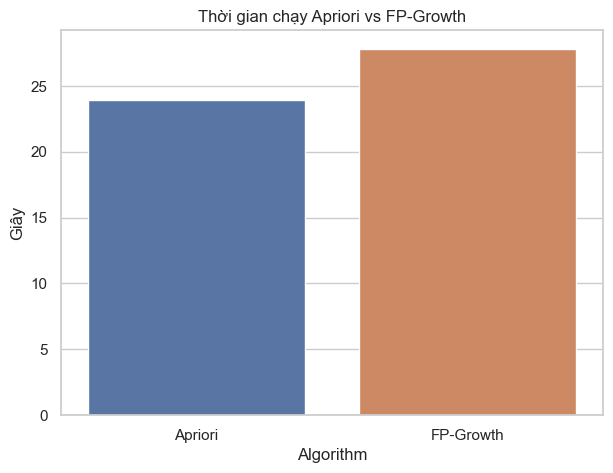

In [7]:
plt.figure(figsize=(7,5))
sns.barplot(x="Algorithm", y="Time_sec", data=compare_df)
plt.title("Thời gian chạy Apriori vs FP-Growth")
plt.ylabel("Giây")
plt.show()

## Biểu đồ số lượng luật sinh ra

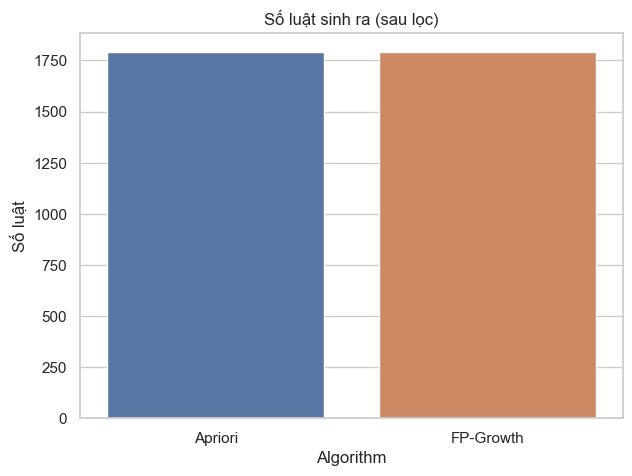

In [8]:
plt.figure(figsize=(7,5))
sns.barplot(x="Algorithm", y="Num_rules", data=compare_df)
plt.title("Số luật sinh ra (sau lọc)")
plt.ylabel("Số luật")
plt.show()

## So sánh chất lượng luật

In [9]:
quality_df = pd.DataFrame({
    "Algorithm": ["Apriori", "FP-Growth"],
    "avg_support": [rules_ap["support"].mean(), rules_fpg["support"].mean()],
    "avg_confidence": [rules_ap["confidence"].mean(), rules_fpg["confidence"].mean()],
    "avg_lift": [rules_ap["lift"].mean(), rules_fpg["lift"].mean()],
})

quality_df


,Algorithm,avg_support,avg_confidence,avg_lift
0,Apriori,0.01385,0.535189,13.570162
1,FP-Growth,0.01385,0.535189,13.570162


## Biểu đồ so sánh lift trung bình

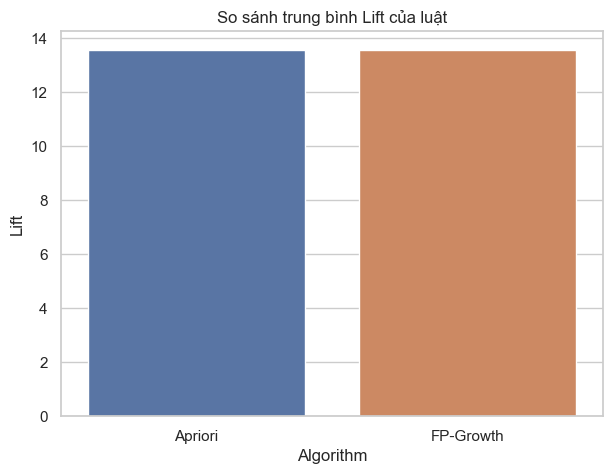

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(x="Algorithm", y="avg_lift", data=quality_df)
plt.title("So sánh trung bình Lift của luật")
plt.ylabel("Lift")
plt.show()


## So sánh độ đa dạng sản phẩm có trong luật

In [11]:
prod_ap = set(rules_ap["antecedents_str"].str.split(", ").sum() + 
              rules_ap["consequents_str"].str.split(", ").sum())

prod_fpg = set(rules_fpg["antecedents_str"].str.split(", ").sum() + 
               rules_fpg["consequents_str"].str.split(", ").sum())

print("=== Độ phủ sản phẩm trong luật ===")
print(f"Sản phẩm xuất hiện trong luật Apriori:   {len(prod_ap)}")
print(f"Sản phẩm xuất hiện trong luật FPGrowth: {len(prod_fpg)}")


=== Độ phủ sản phẩm trong luật ===
Sản phẩm xuất hiện trong luật Apriori:   254
Sản phẩm xuất hiện trong luật FPGrowth: 254


## Lưu bảng tổng hợp kết quả ra CSV

In [12]:
final_compare = pd.concat([compare_df, quality_df.drop(columns=["Algorithm"])], axis=1)

final_compare.to_csv(OUTPUT_COMPARE_TABLE, index=False)
print("Đã lưu bảng tổng hợp so sánh vào:", OUTPUT_COMPARE_TABLE)


Đã lưu bảng tổng hợp so sánh vào: data/processed/comparison_apriori_vs_fpg.csv
